# Result 
1. Outlier droped
2. Model is trained

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings as w
w.filterwarnings('ignore')

In [2]:
train=pd.read_csv('trainlr.csv')
test=pd.read_csv('testlr.csv')

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
xtrain=train['x']
ytrain=train['y']

<AxesSubplot:xlabel='x', ylabel='Count'>

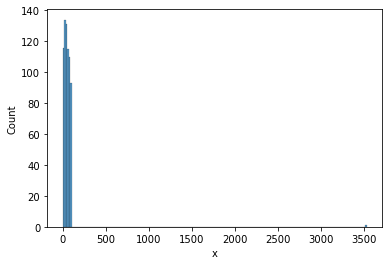

In [5]:
sns.histplot(xtrain, bins=200)

<AxesSubplot:xlabel='x'>

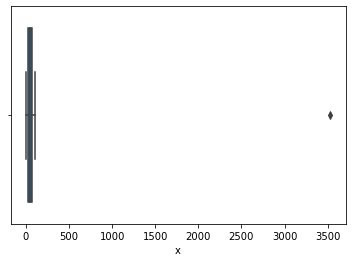

In [6]:
sns.boxplot(xtrain)

# Droping outliers

In [7]:
xtrain.describe()

count     700.000000
mean       54.985939
std       134.681703
min         0.000000
25%        25.000000
50%        49.000000
75%        75.000000
max      3530.157369
Name: x, dtype: float64

In [8]:
mean=xtrain.mean()
mean

54.98593909881429

In [9]:
std=xtrain.std()
std

134.68170287857296

In [10]:
sorted_data=sorted(xtrain)

In [11]:
q1,q3=np.percentile(xtrain,[25,75])
q1,q3

(25.0, 75.0)

In [12]:
IQR=q3-q1
IQR

50.0

In [13]:
left_fence=q1-1.5*IQR
right_fence=q3+1.5*IQR
left_fence,right_fence

(-50.0, 150.0)

In [14]:
i=xtrain

In [15]:
outlier=train[(i<left_fence)&(i>right_fence)]
outlier

,x,y


In [16]:
no_outlier=train[(i>left_fence)&(i<right_fence)]
no_outlier

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


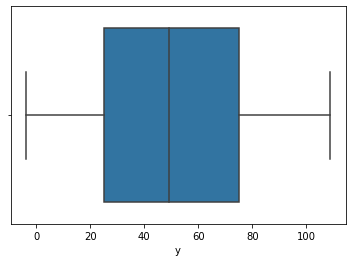

In [57]:
sns.boxplot(no_outlier.y);

In [18]:
xtrain=no_outlier[['x']]
ytrain=no_outlier['y']
train=no_outlier

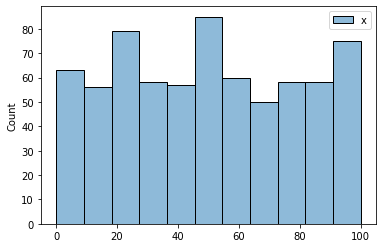

In [58]:
sns.histplot(xtrain);

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [22]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [23]:
lr.predict([[15]])

array([14.90258026])

In [24]:
x=xtrain

In [25]:
pred=lr.predict(x)
pred

array([23.9084877 , 49.92555363, 14.90258026, 37.91767705, 86.94983976,
       35.91636428, 11.90061112, 80.94590147, 24.90914408,  4.89601644,
       15.90323665, 15.90323665, 23.9084877 , 38.91833343, 53.92817916,
       59.93211745, 25.90980046, 72.94065041, 28.91176961, 30.91308237,
       67.9373685 , 86.94983976, 57.93080468, 53.92817916, 83.94787061,
       57.93080468, 48.92489725, 19.90586217, 89.9518089 , 47.92424086,
        3.89536006, 24.90914408, 41.92030257, -0.10726546, 59.93211745,
       92.95377805, 38.91833343,  6.89732921, 20.90651855, 67.9373685 ,
       83.94787061, -0.10726546, 57.93080468, 18.90520579, 35.91636428,
       18.90520579, 58.93146107, 50.92621001, 18.90520579, 32.91439514,
       84.94852699, 43.92161534,  4.89601644, 58.93146107, 13.90192388,
        8.89864197, 74.94196317, 68.93802488,  9.89929835, 16.90389303,
       57.93080468, 73.94130679, 20.90651855, 50.92621001, 18.90520579,
       49.92555363, 23.9084877 , -0.10726546, 11.90061112, 74.94

In [26]:
train['pred_result']=pred
train.head()

,x,y,pred_result
0,24.0,21.549452,23.908488
1,50.0,47.464463,49.925554
2,15.0,17.218656,14.902580
3,38.0,36.586398,37.917677
4,87.0,87.288984,86.949840


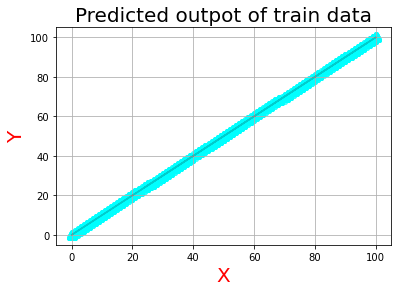

In [80]:
plt.scatter(xtrain,pred,marker='^',color='cyan',linewidths=5,alpha=.5)
plt.xlabel('X',size=20,color='red')
plt.ylabel('Y',size=20,color='red')
plt.title('Predicted outpot of train data',size=20);
plt.grid()
plt.plot(xtrain.squeeze(),pred ,color='black',alpha=.2)

In [28]:
test.isnull().sum()

x    0
y    0
dtype: int64

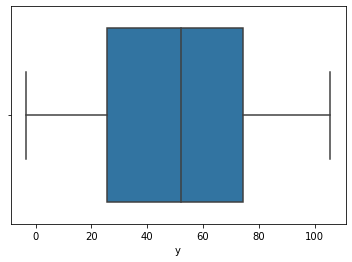

In [44]:
sns.boxplot(test.y);

In [30]:
xtest=test[['x']]
ytest=test['y']

In [31]:
lr.fit(xtest,ytest)

LinearRegression()

In [33]:
pred1=lr.predict(xtest)

In [35]:
pred1

array([ 77.64201157,  20.83923168,  21.85356704,  19.82489633,
        36.05426201,  14.75321955,  62.42698124,  95.90004796,
        19.82489633,   4.609866  ,   3.59553065,  18.81056097,
        96.91438332,  62.42698124,  36.05426201,  14.75321955,
        65.46998731,  13.7388842 ,  87.78536512,  69.52732873,
        89.81403583,  51.26929234,  89.81403583,  26.92524381,
        97.92871867,  58.36963982,  79.67068228,  20.83923168,
        93.87137725,  26.92524381,  99.95738938,  30.98258524,
        33.01125595,  80.68501764,  27.93957917,  47.21195092,
        53.29796305,  69.52732873,  27.93957917,  33.01125595,
        91.84270654,  71.55599944,  50.25495698,  76.62767622,
         3.59553065,  37.06859737,  70.54166408,  68.51299337,
        40.11160343,  35.03992666,  94.88571261,  88.79970048,
        52.28362769,  30.98258524,  59.38397518,  -0.46181077,
        39.09726808,  64.45565195,  69.52732873,  57.35530447,
        12.72454884,  72.57033479,  76.62767622,  61.41

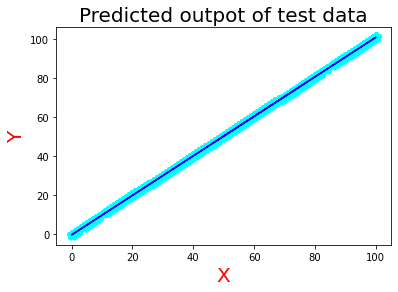

In [90]:
plt.scatter(xtest,pred1,marker='*',color='cyan',linewidths=5)
plt.xlabel('X',size=20,color='red')
plt.ylabel('Y',size=20,color='red')
plt.plot(xtest.squeeze() , lr.predict(xtest), color='blue')
plt.title('Predicted outpot of test data',size=20,color='black');